# Multiple Objectives for Residential PV

## Set up.

### One only needs to execute the following line once, in order to make sure recent enough packages are installed.

In [1]:
#!pip install 'numpy>=1.17.2' 'pandas>=0.25.1'

### Import packages.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath("../../../src"))

In [3]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb

# The `tyche` package is located at <https://github.com/NREL/portfolio/tree/master/production-function/src/tyche/>.
import tyche             as ty

from copy            import deepcopy
from IPython.display import Image 

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [4]:
designs = ty.Designs(path = '.',
                     name = 'pv-residential-simple.xlsx')

In [5]:
investments = ty.Investments(path = '.',
                             name = 'pv-residential-simple.xlsx')

### Compile the production and metric functions for each technology in the dataset.

In [6]:
designs.compile()

## Examine the data.

### The `functions` table specifies where the Python code for each technology resides.

In [7]:
designs.functions

,Style,Model,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Residential PV,numpy,pv_residential_simple,capital_cost,fixed_cost,production,metrics,NaN


Right now, only the style `numpy` is supported.

### The `indices` table defines the subscripts for variables.

In [8]:
designs.indices

Offset  \
Technology     Type    Index                 
Residential PV Capital BoS               2   
                       Inverter          1   
                       Module            0   
               Input   NaN               0   
               Metric  GHG               2   
                       LCOE              0   
                       Labor             1   
               Output  Electricity       0   

                                                              Description  \
Technology     Type    Index                                                
Residential PV Capital BoS                              balance of system   
                       Inverter                          system inverters   
                       Module                               system module   
               Input   NaN                                      no inputs   
               Metric  GHG                              reduction in GHGs   
                       LCOE         reduction in levelized cost of energy   
                       Labor                increase in spending on wages   
               Output  Electricity                  electricity generated   

                                   Notes  
Technology     Type    Index              
Residential PV Capital BoS           NaN  
                       Inverter      NaN  
                       Module        NaN  
               Input   NaN           NaN  
               Metric  GHG           NaN  
                       LCOE          NaN  
                       Labor         NaN  
               Output  Electricity   NaN

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [9]:
designs.designs

Value  \
Technology     Scenario             Variable          Index               
Residential PV 2015 Actual          Input             NaN             0   
                                    Input efficiency  NaN             1   
                                    Input price       NaN             0   
                                    Lifetime          BoS             1   
                                                      Inverter        1   
...                                                                 ...   
               Module Slow Progress Lifetime          Inverter        1   
                                                      Module          1   
                                    Output efficiency Electricity     1   
                                    Output price      Electricity     0   
                                    Scale             Electricity     1   

                                                                             Units  \
Technology     Scenario             Variable          Index                          
Residential PV 2015 Actual          Input             NaN                        1   
                                    Input efficiency  NaN                        1   
                                    Input price       NaN                        1   
                                    Lifetime          BoS          system-lifetime   
                                                      Inverter     system-lifetime   
...                                                                            ...   
               Module Slow Progress Lifetime          Inverter     system-lifetime   
                                                      Module       system-lifetime   
                                    Output efficiency Electricity              W/W   
                                    Output price      Electricity            $/kWh   
                                    Scale             Electricity    system/system   

                                                                                                             Notes  
Technology     Scenario             Variable          Index                                                         
Residential PV 2015 Actual          Input             NaN                                                no inputs  
                                    Input efficiency  NaN                                                no inputs  
                                    Input price       NaN                                                no inputs  
                                    Lifetime          BoS                                per-lifetime computations  
                                                      Inverter                           per-lifetime computations  
...                                                                                                            ...  
               Module Slow Progress Lifetime          Inverter                           per-lifetime computations  
                                                      Module                             per-lifetime computations  
                                    Output efficiency Electricity  see parameter table for individual efficiencies  
                                    Output price      Electricity                   not tracking electricity price  
                                    Scale             Electricity                                       no scaling  

[90 rows x 3 columns]

### The `parameters` table contains additional techno-economic parameters for each technology.

In [10]:
designs.parameters

Offset  \
Technology     Scenario             Parameter                      
Residential PV 2015 Actual          Customer Acquisition      19   
                                    DC-to-AC Ratio            15   
                                    Direct Labor              17   
                                    Discount Rate              0   
                                    Hardware Capital          16   
...                                                          ...   
               Module Slow Progress Module Lifetime            4   
                                    Module O&M Fixed           7   
                                    Module Soiling Loss       10   
                                    Permitting                18   
                                    System Size                2   

                                                                                           Value  \
Technology     Scenario             Parameter                                                      
Residential PV 2015 Actual          Customer Acquisition     st.triang(0.5, loc=2000, scale=0.2)   
                                    DC-to-AC Ratio        st.triang(0.5, loc=1.4, scale=0.00014)   
                                    Direct Labor             st.triang(0.5, loc=2000, scale=0.2)   
                                    Discount Rate                                           0.07   
                                    Hardware Capital         st.triang(0.5, loc=80, scale=0.008)   
...                                                                                          ...   
               Module Slow Progress Module Lifetime              st.triang(0.5, loc=26, scale=1)   
                                    Module O&M Fixed           st.triang(0.5, loc=19, scale=0.5)   
                                    Module Soiling Loss   st.triang(0.5, loc=0.05, scale=10E-06)   
                                    Permitting               st.triang(0.5, loc=600, scale=0.06)   
                                    System Size                                               36   

                                                             Units Notes  
Technology     Scenario             Parameter                             
Residential PV 2015 Actual          Customer Acquisition  $/system   BCA  
                                    DC-to-AC Ratio               1   IDC  
                                    Direct Labor          $/system   BLR  
                                    Discount Rate           1/year    DR  
                                    Hardware Capital         $/m^2   BCC  
...                                                            ...   ...  
               Module Slow Progress Module Lifetime             yr   MLT  
                                    Module O&M Fixed        $/kWyr   MOM  
                                    Module Soiling Loss          1   MSL  
                                    Permitting            $/system   BPR  
                                    System Size                m^2   SSZ  

[210 rows x 4 columns]

### The `results` table specifies the units of measure for results of computations.

In [11]:
designs.results

Units  \
Technology     Variable Index                             
Residential PV Cost     Cost                   $/system   
               Metric   GHG          delta gCO2e/system   
                        LCOE                delta $/kWh   
                        Labor            delta $/system   
               Output   Electricity                 kWh   

                                                                                 Notes  
Technology     Variable Index                                                           
Residential PV Cost     Cost                                                       NaN  
               Metric   GHG          Quantified as a reduction from a base case: ma...  
                        LCOE         Quantified as a reduction from a base case: ma...  
                        Labor        Quantified as a reduction from a base case: mi...  
               Output   Electricity                                                NaN

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Category`.

In [12]:
investments.tranches

Amount Notes
Category     Tranche             Scenario                                 
BoS R&D      BoS High R&D        BoS Fast Progress            900000   NaN
             BoS Low R&D         BoS Slow Progress            300000   NaN
             BoS Medium R&D      BoS Moderate Progress        600000   NaN
Inverter R&D Inverter High R&D   Inverter Fast Progress      3000000   NaN
             Inverter Low R&D    Inverter Slow Progress      1000000   NaN
             Inverter Medium R&D Inverter Moderate Progress  2000000   NaN
Module R&D   Module High R&D     Module Fast Progress        4500000   NaN
             Module Low R&D      Module Slow Progress        1500000   NaN
             Module Medium R&D   Module Moderate Progress    3000000   NaN

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [13]:
investments.investments

Notes
Investment Category     Tranche                  
High R&D   BoS R&D      BoS High R&D          NaN
           Inverter R&D Inverter High R&D     NaN
           Module R&D   Module High R&D       NaN
Low R&D    BoS R&D      BoS Low R&D           NaN
           Inverter R&D Inverter Low R&D      NaN
           Module R&D   Module Low R&D        NaN
Medium R&D BoS R&D      BoS Medium R&D        NaN
           Inverter R&D Inverter Medium R&D   NaN
           Module R&D   Module Medium R&D     NaN

## Evaluate the tranches in the dataset.

In [14]:
tranche_results = investments.evaluate_tranches(designs, sample_count=50)

Evaluating Residential PV


In [15]:
tranche_results.metrics.xs(1, level="Sample", drop_level=False)

Value  \
Technology     Scenario                   Sample Variable Index                        
Residential PV 2015 Actual                1      Cost     Cost          19540.879640   
                                                 Metric   GHG              -0.009874   
                                                          LCOE             -0.000024   
                                                          Labor            -0.027451   
                                                 Output   Electricity  184088.965782   
               BoS Fast Progress          1      Cost     Cost          17562.483089   
                                                 Metric   GHG              -0.003392   
                                                          LCOE              0.010730   
                                                          Labor          -554.070614   
                                                 Output   Electricity  184103.400647   
               BoS Moderate Progress      1      Cost     Cost          17845.478895   
                                                 Metric   GHG              -0.008622   
                                                          LCOE              0.009187   
                                                          Labor          -350.052033   
                                                 Output   Electricity  184091.752874   
               BoS Slow Progress          1      Cost     Cost          19019.395238   
                                                 Metric   GHG               0.003206   
                                                          LCOE              0.002825   
                                                          Labor          -172.479378   
                                                 Output   Electricity  184118.092551   
               Inverter Fast Progress     1      Cost     Cost          17826.704433   
                                                 Metric   GHG               1.944002   
                                                          LCOE              0.011524   
                                                          Labor            -0.025162   
                                                 Output   Electricity  188440.035418   
               Inverter Moderate Progress 1      Cost     Cost          18577.552379   
                                                 Metric   GHG               2.342062   
                                                          LCOE              0.008001   
                                                          Labor             0.018449   
                                                 Output   Electricity  189326.473505   
               Inverter Slow Progress     1      Cost     Cost          19247.553605   
                                                 Metric   GHG               2.313997   
                                                          LCOE              0.004428   
                                                          Labor            -0.065192   
                                                 Output   Electricity  189263.974279   
               Module Fast Progress       1      Cost     Cost          18889.689863   
                                                 Metric   GHG              48.280551   
                                                          LCOE              0.041351   
                                                          Labor            -0.000315   
                                                 Output   Electricity  291626.515164   
               Module Moderate Progress   1      Cost     Cost          19088.651836   
                                                 Metric   GHG              42.590275   
                                                          LCOE              0.037696   
                                                          Labor            -0.046368   
                               

### Save results.

In [16]:
#tranche_results.metrics.to_csv("example-tranches.csv")

### Plot GHG metric.

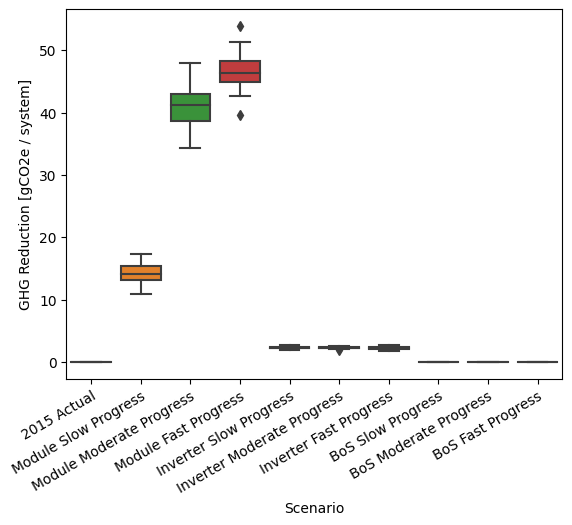

In [17]:
g = sb.boxplot(
    x="Tranche",
    y="Value",
    data=tranche_results.metrics.xs(
        "GHG",
        level="Index"
    ).reset_index()[["Tranche", "Value"]],
    order=[
        "Module No R&D",
        "Module Low R&D",
        "Module Medium R&D",
        "Module High R&D",
        "Inverter Low R&D",
        "Inverter Medium R&D",
        "Inverter High R&D",
        "BoS Low R&D",
        "BoS Medium R&D",
        "BoS High R&D",
    ]
)
g.set(ylabel="GHG Reduction [gCO2e / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor');

### Plot LCOE metric.

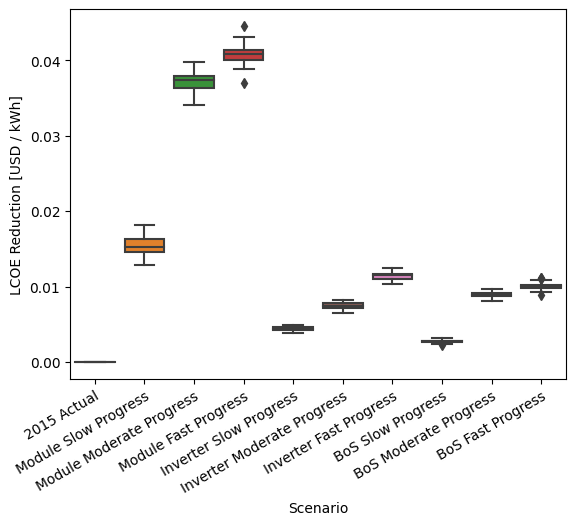

In [18]:
g = sb.boxplot(
    x="Tranche",
    y="Value",
    data=tranche_results.metrics.xs(
        "LCOE",
        level="Index"
    ).reset_index()[["Tranche", "Value"]],
    order=[
        "Module No R&D",
        "Module Low R&D",
        "Module Medium R&D",
        "Module High R&D",
        "Inverter Low R&D",
        "Inverter Medium R&D",
        "Inverter High R&D",
        "BoS Low R&D",
        "BoS Medium R&D",
        "BoS High R&D",
    ]
)
g.set(ylabel="LCOE Reduction [USD / kWh]")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor');

### Plot labor metric.

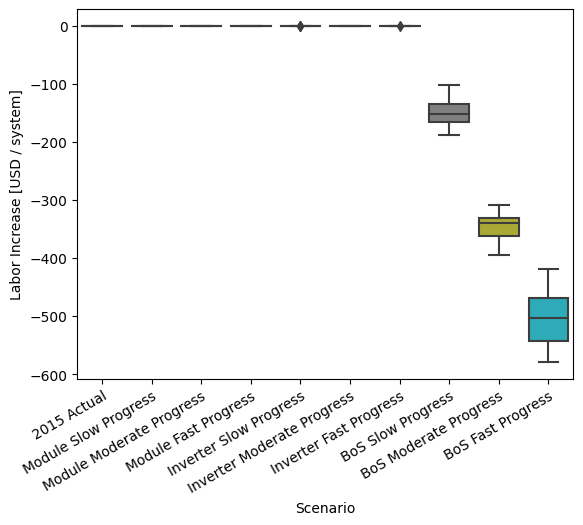

In [19]:
g = sb.boxplot(
    x="Tranche",
    y="Value",
    data=tranche_results.metrics.xs(
        "Labor",
        level="Index"
    ).reset_index()[["Tranche", "Value"]],
    order=[
        "Module No R&D",
        "Module Low R&D",
        "Module Medium R&D",
        "Module High R&D",
        "Inverter Low R&D",
        "Inverter Medium R&D",
        "Inverter High R&D",
        "BoS Low R&D",
        "BoS Medium R&D",
        "BoS High R&D",
    ]
)
g.set(ylabel="Labor Increase [USD / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor');

## Evaluate the investments in the dataset.

In [20]:
investment_results = investments.evaluate_investments(designs, sample_count=50)

Evaluating Residential PV
Evaluating Residential PV


### Costs of investments.

In [21]:
investment_results.amounts

,Amount
Investment,
High R&D,90000030000004500000
Low R&D,30000010000001500000
Medium R&D,60000020000003000000


### Benefits of investments.

In [22]:
investment_results.metrics.xs(1, level="Sample", drop_level=False)

Value  \
Investment Category     Tranche             Scenario                   Sample Technology     Index               
High R&D   BoS R&D      BoS High R&D        BoS Fast Progress          1      Residential PV GHG     -0.005981   
                                                                                             LCOE     0.010638   
                                                                                             Labor -557.226466   
Medium R&D BoS R&D      BoS Medium R&D      BoS Moderate Progress      1      Residential PV GHG     -0.001994   
                                                                                             LCOE     0.009472   
                                                                                             Labor -327.703298   
Low R&D    BoS R&D      BoS Low R&D         BoS Slow Progress          1      Residential PV GHG     -0.005780   
                                                                                             LCOE     0.002579   
                                                                                             Labor -163.158631   
High R&D   Inverter R&D Inverter High R&D   Inverter Fast Progress     1      Residential PV GHG      2.020205   
                                                                                             LCOE     0.010384   
                                                                                             Labor    0.000490   
Medium R&D Inverter R&D Inverter Medium R&D Inverter Moderate Progress 1      Residential PV GHG      2.376189   
                                                                                             LCOE     0.007254   
                                                                                             Labor    0.060580   
Low R&D    Inverter R&D Inverter Low R&D    Inverter Slow Progress     1      Residential PV GHG      2.395318   
                                                                                             LCOE     0.004417   
                                                                                             Labor    0.025669   
High R&D   Module R&D   Module High R&D     Module Fast Progress       1      Residential PV GHG     52.247427   
                                                                                             LCOE     0.044012   
                                                                                             Labor    0.077091   
Medium R&D Module R&D   Module Medium R&D   Module Moderate Progress   1      Residential PV GHG     42.598410   
                                                                                             LCOE     0.037809   
                                                                                             Labor    0.072191   
Low R&D    Module R&D   Module Low R&D      Module Slow Progress       1      Residential PV GHG     14.861316   
                                                                                             LCOE     0.015697   
                                                                                             Labor    0.092416   

                                                                                                                 Units  
Investment Category     Tranche             Scenario                   Sample Technology     Index                      
High R&D   BoS R&D      BoS High R&D        BoS Fast Progress          1      Residential PV GHG    delta gCO2e/system  
                                                                                             LCOE          delta $/kWh  
                                                                                             Labor      delta $/system  
Medium R&D BoS R&D      BoS Medium R&D      BoS Moderate Progress      1      Residential PV GHG    delta gCO2e/system  
                                                                        

In [23]:
investment_results.summary.xs(1, level="Sample", drop_level=False)

Value               Units
Investment Technology     Sample Index                                
High R&D   Residential PV 1      GHG     54.261650  delta gCO2e/system
                                 LCOE     0.065034         delta $/kWh
                                 Labor -557.148884      delta $/system
Low R&D    Residential PV 1      GHG     17.250853  delta gCO2e/system
                                 LCOE     0.022693         delta $/kWh
                                 Labor -163.040546      delta $/system
Medium R&D Residential PV 1      GHG     44.972606  delta gCO2e/system
                                 LCOE     0.054535         delta $/kWh
                                 Labor -327.570527      delta $/system

### Save results.

In [24]:
#investment_results.amounts.to_csv("example-investment-amounts.csv")

In [25]:
#investment_results.metrics.to_csv("example-investment-metrics.csv")

### Plot GHG metric.

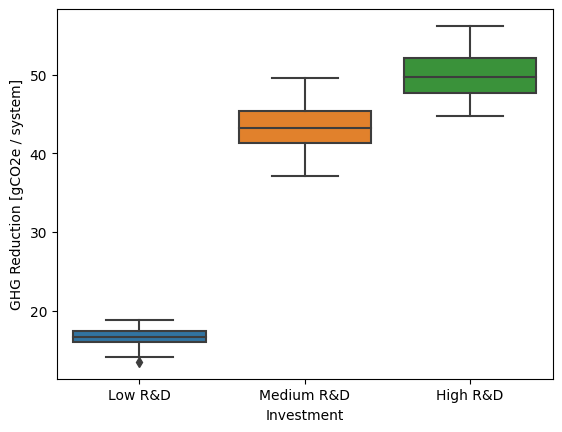

In [26]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "GHG",
        level="Index"
    ).groupby(["Investment", "Sample"]).sum(numeric_only=True).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="GHG Reduction [gCO2e / system]")
g.set_xticklabels(g.get_xticklabels());

### Plot LCOE metric.

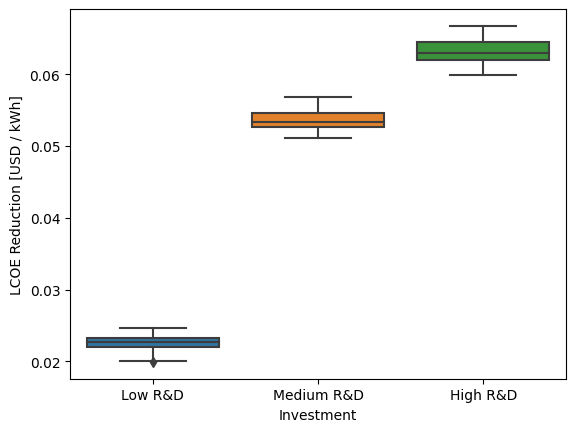

In [27]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "LCOE",
        level="Index"
    ).groupby(["Investment", "Sample"]).sum(numeric_only=True).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="LCOE Reduction [USD / kWh]")
g.set_xticklabels(g.get_xticklabels());

### Plot labor metric.

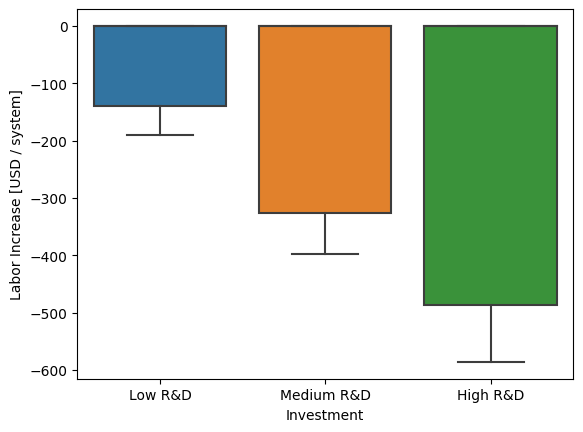

In [28]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "Labor",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="Labor Increase [USD / system]")
g.set_xticklabels(g.get_xticklabels());

## Multi-objective decision analysis.

### Compute costs and metrics for tranches.

Tranches are atomic units for building investment portfolios. Evaluate all of the tranches, so we can assemble them into investments (portfolios).

In [29]:
tranche_results = investments.evaluate_tranches(designs, sample_count=50)

Evaluating Residential PV


Display the cost of each tranche.

In [30]:
tranche_results.amounts

Amount
Category     Tranche                       
BoS R&D      BoS High R&D          900000.0
             BoS Low R&D           300000.0
             BoS Medium R&D        600000.0
Inverter R&D Inverter High R&D    3000000.0
             Inverter Low R&D     1000000.0
             Inverter Medium R&D  2000000.0
Module R&D   Module High R&D      4500000.0
             Module Low R&D       1500000.0
             Module Medium R&D    3000000.0

Display the metrics for each tranche.

In [31]:
tranche_results.summary

Value  \
Category   Technology     Tranche           Sample Index               
BoS R&D    Residential PV BoS High R&D      1      GHG     -0.005075   
                                                   LCOE     0.009841   
                                                   Labor -500.418449   
                                            2      GHG     -0.003232   
                                                   LCOE     0.009866   
...                                                              ...   
Module R&D Residential PV Module Medium R&D 49     LCOE     0.035325   
                                                   Labor    0.006741   
                                            50     GHG     38.825571   
                                                   LCOE     0.036609   
                                                   Labor    0.037232   

                                                                       Units  
Category   Technology     Tranche           Sample Index                      
BoS R&D    Residential PV BoS High R&D      1      GHG    delta gCO2e/system  
                                                   LCOE          delta $/kWh  
                                                   Labor      delta $/system  
                                            2      GHG    delta gCO2e/system  
                                                   LCOE          delta $/kWh  
...                                                                      ...  
Module R&D Residential PV Module Medium R&D 49     LCOE          delta $/kWh  
                                                   Labor      delta $/system  
                                            50     GHG    delta gCO2e/system  
                                                   LCOE          delta $/kWh  
                                                   Labor      delta $/system  

[1350 rows x 2 columns]

Save the results.

In [32]:
#tranche_results.amounts.to_csv("example-tranche-amounts.csv")
#tranche_results.summary.to_csv("example-tranche-summary.csv")

### Fit a response surface to the results.

The response surface interpolates between the discrete set of cases provided in the expert elicitation. This allows us to study funding levels intermediate between those scenarios.

In [33]:
evaluator = ty.Evaluator(tranche_results)

Here are the categories of investment and the maximum amount that could be invested in each:

In [34]:
evaluator.max_amount

,Amount
Category,
BoS R&D,900000.0
Inverter R&D,3000000.0
Module R&D,4500000.0


Here are the metrics and their units of measure:

In [35]:
evaluator.units

,Units
Index,
GHG,delta gCO2e/system
LCOE,delta $/kWh
Labor,delta $/system


#### Example interpolation.

Let's evaluate the case where each category is invested in at half of its maximum amount.

In [36]:
example_investments = evaluator.max_amount / 2
example_investments

,Amount
Category,
BoS R&D,450000.0
Inverter R&D,1500000.0
Module R&D,2250000.0


In [37]:
evaluator.evaluate(example_investments)

Category    Index  Sample
BoS R&D     GHG    1         -0.0018845843191854783
                   2          -0.002485584851406486
                   3          -0.002832928377920041
                   4          0.0013937966856687467
                   5          -0.002351347475425314
                                      ...          
Module R&D  Labor  46           0.03421064839835708
                   47          0.025304806005010505
                   48           0.05468647241400504
                   49          0.014244829080894306
                   50          0.016914375190481223
Name: Value, Length: 450, dtype: object

Let's evaluate the mean instead of outputing the whole distribution.

In [38]:
evaluator.evaluate_statistic(example_investments, np.mean)

,Value
Index,
GHG,29.708393
LCOE,0.037985
Labor,-244.278439


Here is the standard deviation:

In [39]:
evaluator.evaluate_statistic(example_investments, np.std)

,Value
Index,
GHG,1.787736
LCOE,0.001066
Labor,13.600041


A risk-averse decision maker might be interested in the 10% percentile:

In [40]:
evaluator.evaluate_statistic(example_investments, lambda x: np.quantile(x, 0.1))

,Value
Index,
GHG,27.430082
LCOE,0.036415
Labor,-260.372945


### ε-Constraint multiobjective optimization

In [41]:
optimizer = ty.EpsilonConstraintOptimizer(evaluator)

In order to meaningfully map the decision space, we need to know the maximum values for each of the metrics.

#### Example optimization.

Limit spending to $3M.

In [42]:
investment_max = 3e6

Require that the GHG reduction be at least 40 gCO2e/system and that the Labor wages not decrease.

In [43]:
metric_min = pd.Series([40, 0], name = "Value", index = ["GHG", "Labor"])
metric_min

GHG      40
Labor     0
Name: Value, dtype: int64

Compute the ε-constrained maximum for the LCOE.

In [44]:
optimum = optimizer.opt_slsqp(
    "LCOE"                       ,
    sense = 'max',
    total_amount = investment_max,
    statistic    = np.mean       ,
)
optimum.exit_message

'Optimization terminated successfully'

Here are the optimal spending levels:

In [45]:
np.round(optimum.amounts)

Category
BoS R&D          600000.0
Inverter R&D          0.0
Module R&D      2400000.0
Name: Amount, dtype: float64

Here are the three metrics at that optimum:

In [46]:
optimum.metrics

Index
GHG         32.4015
LCOE       0.038861
Labor   -342.072969
Name: Value, dtype: object

*Thus, by putting all of the investment into Module R&D, we can expected to achieve a mean 3.75 ¢/kWh reduction in LCOE under the GHG and Labor constraints.*

It turns out that there is no solution for these constraints if we evaluate the 10th percentile of the metrics, for a risk-averse decision maker.

In [47]:
optimum = optimizer.opt_slsqp(
    "LCOE"                       ,
    sense = 'max',
    total_amount = investment_max,
    statistic    = lambda x: np.quantile(x, 0.1),
)
optimum.exit_message

'Optimization terminated successfully'

Let's try again, but with a less stringent set of constraints, only constraining GHG somewhat  but not Labor at all.

In [48]:
optimum = optimizer.opt_slsqp(
    "LCOE"                                                         ,
    sense = 'max',
    total_amount = investment_max                                  ,
    statistic    = lambda x: np.quantile(x, 0.1)                  ,
)
optimum.exit_message

'Optimization terminated successfully'

In [49]:
np.round(optimum.amounts)

Category
BoS R&D          600001.0
Inverter R&D          0.0
Module R&D      2399999.0
Name: Amount, dtype: float64

In [50]:
optimum.metrics

Index
GHG       29.133497
LCOE       0.036786
Labor   -367.280795
Name: Value, dtype: object

### Example MILP optimization

This formulation converts the original non-linear optimization into a piecewise linear, mixed-integer optimization, and then attempts to solve the same problem.

~~As written, the MILP formulation is infeasible.~~

In [51]:
investment_max = 3e6
metric_min = pd.Series([40, 0], name = "Value", index = ["GHG", "Labor"])

optimum = optimizer.opt_milp(
    "LCOE"                       ,
    sense = 'max',
    total_amount = investment_max,
    statistic    = np.mean       ,
)

optimum.exit_message

An error occurred while loading the CBC library:	 cannot load library '/Users/tghosh/miniconda3/envs/tyche/lib/python3.10/site-packages/mip/libraries/cbc-c-darwin-x86-64.dylib': dlopen(/Users/tghosh/miniconda3/envs/tyche/lib/python3.10/site-packages/mip/libraries/cbc-c-darwin-x86-64.dylib, 0x0002): tried: '/Users/tghosh/miniconda3/envs/tyche/lib/python3.10/site-packages/mip/libraries/cbc-c-darwin-x86-64.dylib' (mach-o file, but is an incompatible architecture (have (x86_64), need (arm64e))).  Additionally, ctypes.util.find_library() did not manage to locate a library called '/Users/tghosh/miniconda3/envs/tyche/lib/python3.10/site-packages/mip/libraries/cbc-c-darwin-x86-64.dylib'



NameError: name 'cbclib' is not defined

Let's determine if the problem is truly infeasible or if the solver is failing by examining the underlying data.

In [ ]:
_wide = evaluator.evaluate_corners_wide(np.mean).reset_index()
_wide

Add a column to the above data with the total investment amount.

In [ ]:
_wide['total R&D'] = _wide.loc[:,'BoS R&D'] + _wide.loc[:, 'Inverter R&D'] + _wide.loc[:, 'Module R&D']
_wide

Look for entries that meet the total investment constraint of less than $3 MM.

In [ ]:
_wide.loc[_wide['total R&D'] <= 3e6,:]

~~This entry does not meet the GHG constraint, which is why the MILP formulation is infeasible.~~